# Visualising Text
The objective of this notebook is to learn how to calcualte the frequency of words in our clenaed text and create some visualisations to understand which topics are most promimnent

## Setup + Recap
Before we do anything we need to import our libraries, data and apply our clean_text function. 

In [3]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# We'll also import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# --- Setup all the cleaning tools from the previous notebook ---
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(raw_text):
    text = raw_text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

# --- Load and Clean the Data ---
url = 'https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv'
bbc_df = pd.read_csv(url)
bbc_df['final_tokens'] = bbc_df['text'].apply(clean_text)

print("Setup complete. The BBC dataset is loaded and cleaned.")
bbc_df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Work\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Work\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Setup complete. The BBC dataset is loaded and cleaned.


,category,text,final_tokens
0,tech,tv future in the hands of viewers with home th...,"[tv, future, hand, viewer, home, theatre, syst..."
1,business,worldcom boss left books alone former worldc...,"[worldcom, bos, left, book, alone, former, wor..."
2,sport,tigers wary of farrell gamble leicester say ...,"[tiger, wary, farrell, gamble, leicester, say,..."
3,sport,yeading face newcastle in fa cup premiership s...,"[yeading, face, newcastle, fa, cup, premiershi..."
4,entertainment,ocean s twelve raids box office ocean s twelve...,"[ocean, twelve, raid, box, office, ocean, twel..."


## Calculating Word Frequencies
To count all the words, we first need to take our 'final_tokens' column (which is a list of lists) and flatten it inot a single list of every word in the entire dataset. The .explode() method is perfect for this

In [4]:
# Create a single list of all words from all articles
all_words = bbc_df['final_tokens'].explode()

# Calculate the frequency of each word
word_counts = all_words.value_counts()

# Display the 20 most common words
print(word_counts.head(20))

final_tokens
said          7254
mr            3045
year          2830
would         2577
also          2156
people        2044
new           1970
u             1926
one           1809
could         1511
game          1471
time          1449
last          1381
first         1283
say           1268
world         1214
government    1189
two           1181
company       1113
film          1113
Name: count, dtype: int64


## Visualising Frequencies with a Bar Chart
A long list of numbers is useful, but a chart is much easier to understand. Let's plot out top 20 words 

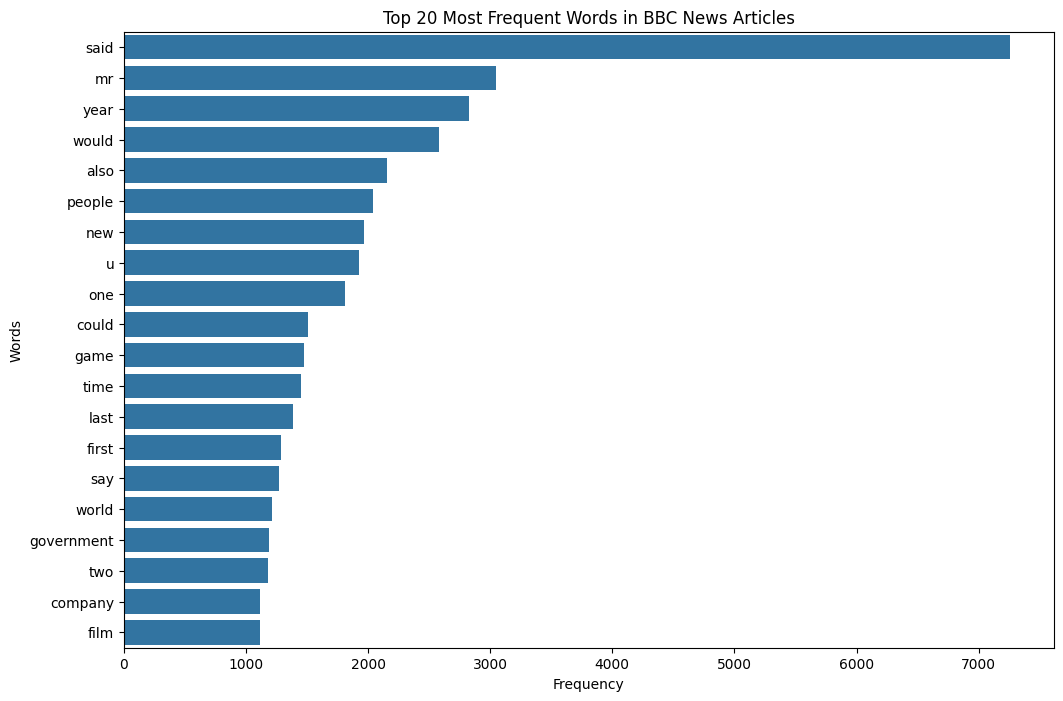

In [5]:
# Select the top 20 words for the plot
top_20_words = word_counts.head(20)

# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_words.values, y=top_20_words.index)
plt.title('Top 20 Most Frequent Words in BBC News Articles')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

## Creating a Word Cloud
Word clouds are a fun and powerful way to visualise word frequency. The size of each word is proportional to its frequency in the text. We'll use the popular wordcloud library, which we may need to first install 

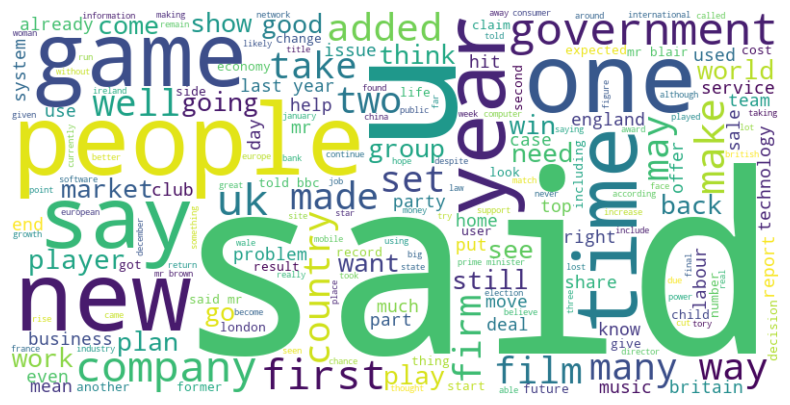

In [6]:
# Install the wordcloud library if you don't have it
!pip install wordcloud

from wordcloud import WordCloud

# The word cloud function needs a single string of text, not a list of tokens.
# So, we'll join all our cleaned words back together with spaces in between.
text_for_wordcloud = " ".join(all_words)

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Exericse
The overall word cloud is interesting, but what if we need to see the key theme for a single category ? 
Task:
1. Create a new DataFrame that only contains the artciles from the 'sport' category
2. Generate a single string of text containgin all the cleaned words from just the sport category 
3. Create and display a word cloud for the sport category. 

In [ ]:
# Your code for the Exercise here

## Conclusion
By now you are hoping to understand some of the differennt techniques and resourses that we are able to do with python for text analysis. 